In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.animation as animation

## Автомобильная авария
Визуализировать материальные точки в движении (водитель и автомобиль) при аварии.
Учесть несколько условий: был ли пристёгнут водитель и присутствовала ли подушка безопасности. В ответе спрогнозировать на сколько смертельным будет удар для водителя.

Для начала стоит рассмотреть летальность исхода для человека. Насколько сильным должен быть удар (т.е. какая сила должна воздействовать на материальную точку),
чтобы человек скончался? По условию нам дан один автомобиль с водителем, следовательно авария будет происходить в результате столкновения автомобиля со статичным
объектом. Теоритически человек способен выдерживать нагрузку 40g, при достижении 50g начнутся травмы внутренних органов, приводящих к смерти. При ударе, во время
автомобильной аварии, работа, совершаемая ударной силой, замедляющей движущийся объект на расстоянии за счет деформации зоны смятия, может быть выражена как работа
силы, которая "сминает" машину в гармошку. Так как машина врезается в статичный объект, средняя сила удара станет константой, так как сминаться больше некуда, а при
ударе, при котором объект не деформирован, работа, совершаемая ударной силой, замедляющей движущийся объект, равна работе, какую бы совершила пружина.

Формула кинетической энергии Ek = mv^2/2
Работа деформации A_д = Fs * S
g - нагрузка, равная ускорению свободного падения, т.е. 9.8 м/с^2
Работа пружины A_п = A_д/2 = ks^2/2 



Приравняем кинетическую энергию с работой деформации: F_avg * S = mv^2/2, следовательно средняя сила, воздействующая на тело F_avg = (mv^2/2)/S, а расстояние,
на которое сомнётся машина будет S = (mv^2/2)/F_avg

In [53]:
def isLethal(isBelted : bool, isAirbag : bool, carMass : int, speed : float):
    lethal = False
    throughWindow = False
    maxForce = 0
    
    if (isBelted == False and isAirbag == False):
        maxForce = 28
        throughWindow = True
    elif (isBelted == False and isAirbag == True):
        maxForce = 33
        throughWindow = True
    elif (isBelted == True and isAirbag == False):
        maxForce = 36
        throughWindow = False
    elif (isBelted == True and isAirbag == True):
        maxForce = 40
        throughWindow = False
        
    maxImpact = (0.5 * carMass * (speed / 3.6)**2) / deformationDistance
    gravityForce = maxImpact / (carMass * 9.8)
    
    if gravityForce > maxForce:
        lethal = True
    
    return lethal, throughWindow

## Визуализируем машину как 2D круг 

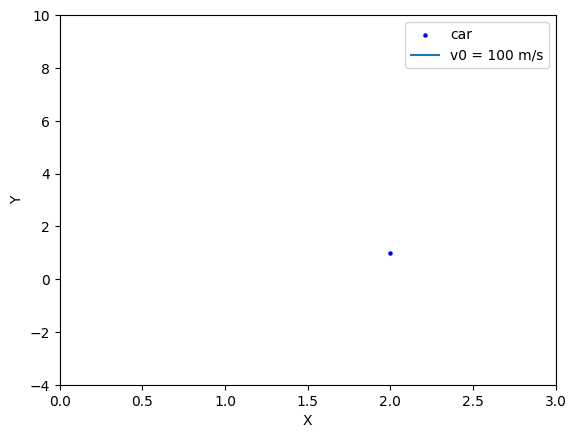

In [56]:
fig, ax = plt.subplots()
t = np.linspace(0, 2*np.pi, 40)
x = 1 + np.cos(t)
y = 1 + np.sin(t)

g = -9.81
v02 = 100
t2 = np.linspace(0, 3, 40)
z2 = g * t2**2 / 2 + v02 * t2

scat = ax.scatter(x[0], y[0], c="b", s=5, label='car')
line2 = ax.plot(t2[0], z2[0], label=f'v0 = {v02} m/s')[0]
ax.set(xlim=[0, 3], ylim=[-4, 10], xlabel='X', ylabel='Y')
ax.legend()

def update(frame):
    xdata = x[:frame]
    ydata = y[:frame]
    data = np.stack([xdata, ydata]).T
    scat.set_offsets(data)
    line2.set_xdata(t2[:frame])
    line2.set_ydata(z2[:frame])
    return (scat, line2)

ani = animation.FuncAnimation(fig=fig, func=update, frames=40, interval=30)
plt.show()